In [1]:
# 1.导入库和模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [2]:
# 2.提取数据集
iris = load_iris() 
X = iris.data
y = iris.target

In [3]:
# 3.建模

#实例化
pca = PCA(n_components=2)

#拟合模型
pca = pca.fit(X)

#获取新矩阵
X_matrix = pca.transform(X)

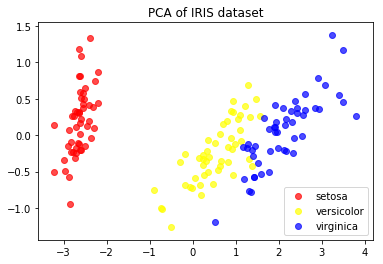

In [4]:
# 4.可视化
colors = ['red','yellow','blue']
plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X_matrix[y == i,0]
                ,X_matrix[y == i,1]
                ,alpha=.7
                ,c=colors[i]
                ,label=iris.target_names[i]
               )
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

In [5]:
# 5.探索降维后的数据

#查看降维后每个新特征向量上所带的信息量大小（可解释性方差的大小）
print(pca.explained_variance_)
print()

#查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比（又叫做可解释方差贡献率）
print(pca.explained_variance_ratio_) #大部分信息都被有效地集中在了第一个特征上
print()

#查看降维后的新特征矩阵的信息在原始矩阵的信息占比
print(pca.explained_variance_ratio_.sum())

[4.22824171 0.24267075]

[0.92461872 0.05306648]

0.9776852063187949


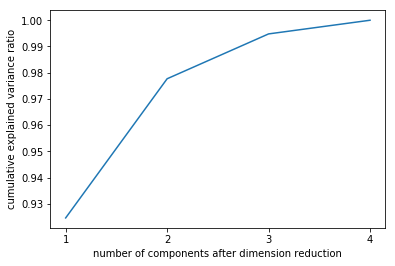

In [6]:
# 6.选择最好的n_components：累积可解释方差贡献率曲线
pca_line = PCA().fit(X)
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4]) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [7]:
# 7.最大似然估计自选超参数
pca_mle = PCA(n_components="mle")
pca_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)

#mle为我们自动选择了3个特征
print(X_mle)
print()

#得到了比设定2个特征时更高的信息含量
print(pca_mle.explained_variance_ratio_.sum())

[[-2.68412563  0.31939725 -0.02791483]
 [-2.71414169 -0.17700123 -0.21046427]
 [-2.88899057 -0.14494943  0.01790026]
 [-2.74534286 -0.31829898  0.03155937]
 [-2.72871654  0.32675451  0.09007924]
 [-2.28085963  0.74133045  0.16867766]
 [-2.82053775 -0.08946138  0.25789216]
 [-2.62614497  0.16338496 -0.02187932]
 [-2.88638273 -0.57831175  0.02075957]
 [-2.6727558  -0.11377425 -0.19763272]
 [-2.50694709  0.6450689  -0.07531801]
 [-2.61275523  0.01472994  0.10215026]
 [-2.78610927 -0.235112   -0.20684443]
 [-3.22380374 -0.51139459  0.06129967]
 [-2.64475039  1.17876464 -0.15162752]
 [-2.38603903  1.33806233  0.2777769 ]
 [-2.62352788  0.81067951  0.13818323]
 [-2.64829671  0.31184914  0.02666832]
 [-2.19982032  0.87283904 -0.12030552]
 [-2.5879864   0.51356031  0.21366517]
 [-2.31025622  0.39134594 -0.23944404]
 [-2.54370523  0.43299606  0.20845723]
 [-3.21593942  0.13346807  0.29239675]
 [-2.30273318  0.09870885  0.03912326]
 [-2.35575405 -0.03728186  0.12502108]
 [-2.50666891 -0.14601688

In [8]:
# 8.按信息量占比选超参数
pca_f = PCA(n_components=0.97,svd_solver="full")
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)
pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])